In [2]:
%matplotlib inline

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('pokemon.csv')

In [5]:
pd.set_option('display.max_columns', 50)

In [6]:
df.rename(columns={'classfication': 'classification'}, inplace=True)
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.00,2.00,1.0,0.25,1.0,2.0,1.0,1.00,2.00,1.0,1.00,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.00,2.00,1.0,0.25,1.0,2.0,1.0,1.00,2.00,1.0,1.00,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.00,2.00,1.0,0.25,1.0,2.0,1.0,1.00,2.00,1.0,1.00,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.50,1.00,1.0,0.50,2.0,0.5,1.0,1.00,1.00,2.0,0.50,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.50,1.00,1.0,0.50,2.0,0.5,1.0,1.00,1.00,2.0,0.50,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.50,0.50,1.00,1.0,0.25,0.0,1.0,1.0,1.00,1.00,4.0,0.50,2.0,104,5120,70,634,45,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.00,1.0,2.00,1.0,0.5,1.0,1.00,1.00,1.0,0.50,0.5,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.00,1.0,2.00,1.0,0.5,1.0,1.00,1.00,1.0,0.50,0.5,63,5120,70,405,45,Turtle Pokémon,80,1059860,1.0,59,Kameilカメール,Wartortle,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.00,1.0,2.00,1.0,0.5,1.0,1.00,1.00,1.0,0.50,0.5,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,Blastoise,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.50,2.00,2.00,1.0,0.50,0.5,1.0,1.0,1.00,1.00,2.0,1.00,1.0,30,3840,70,195,255,Worm Pokémon,35,1000000,0.3,45,Caterpieキャタピー,Caterpie,50.0,10,20,20,45,bug,NaN,2.9,1,0


In [7]:
df.shape

(801, 41)

# Types

In [8]:
df_types = pd.DataFrame(data={'primary_type': df['type1'].value_counts(), 'secondary_type': df['type2'].value_counts()}).reset_index()
df_types.rename(columns={'index': 'type'}, inplace=True)
df_types.head()

,type,primary_type,secondary_type
0,bug,72,5
1,dark,29,21
2,dragon,27,17
3,electric,39,9
4,fairy,18,29


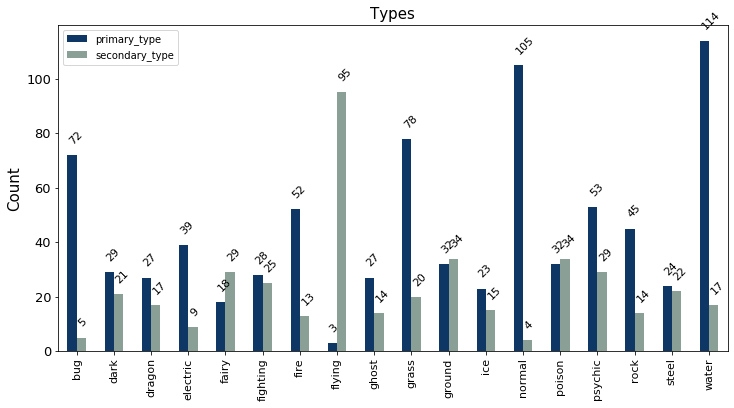

In [9]:
ax = df_types[['primary_type', 'secondary_type']].plot(kind='bar',
              figsize=(12,6), color=['#0f3766', '#8a9f95'], fontsize=13)
# ax.set_alpha(0)
ax.set_title("Types", fontsize=15)
ax.set_ylabel("Count", fontsize=15);
ax.set_xticklabels(labels=df_types['type'], rotation='vertical', fontsize=11)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+4, \
            str(round((i.get_height()), 2)), fontsize=11, color='black', rotation=45)
plt.savefig('Types.png')

# Stats

In [10]:
df_stats = pd.DataFrame(df[['name','hp','attack', 'defense', 'speed', 'sp_attack', 'sp_defense', 'base_total', 'type1', 'type2', 'generation', 'is_legendary']])
base_stats = pd.DataFrame(df[['hp','attack', 'defense', 'speed', 'sp_attack', 'sp_defense']])
df_stats.head()

,name,hp,attack,defense,speed,sp_attack,sp_defense,base_total,type1,type2,generation,is_legendary
0,Bulbasaur,45,49,49,45,65,65,318,grass,poison,1,0
1,Ivysaur,60,62,63,60,80,80,405,grass,poison,1,0
2,Venusaur,80,100,123,80,122,120,625,grass,poison,1,0
3,Charmander,39,52,43,65,60,50,309,fire,NaN,1,0
4,Charmeleon,58,64,58,80,80,65,405,fire,NaN,1,0


In [11]:
statCorr = base_stats.corr()
statCorr

,hp,attack,defense,speed,sp_attack,sp_defense
hp,1.000000,0.410616,0.242378,0.160760,0.365973,0.366971
attack,0.410616,1.000000,0.468915,0.352703,0.368154,0.265836
defense,0.242378,0.468915,1.000000,0.007934,0.241882,0.526348
speed,0.160760,0.352703,0.007934,1.000000,0.438981,0.225977
sp_attack,0.365973,0.368154,0.241882,0.438981,1.000000,0.511496
sp_defense,0.366971,0.265836,0.526348,0.225977,0.511496,1.000000


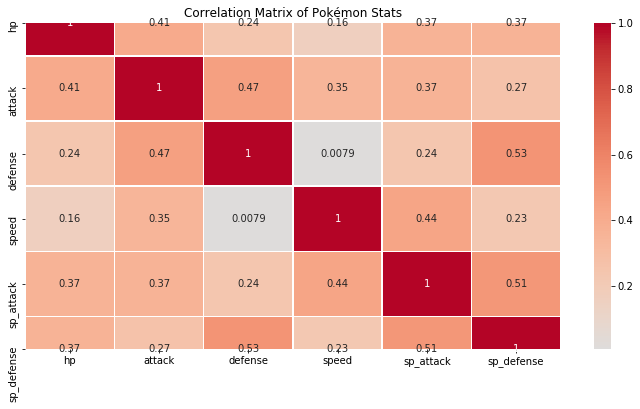

In [12]:
plt.figure(figsize=(12,6))
statCorr_hm = sns.heatmap(statCorr, center=0, cmap='coolwarm', annot=True, linewidths=.5)
plt.title('Correlation Matrix of Pokémon Stats')
plt.savefig("Base Stats.png")

### Top 5 Non Legendary

In [15]:
df_top_nonlegend = df_top.loc[df_top['is_legendary']==0]
top_5_nonlegend = df_top_nonlegend[:5]
top_5_nonlegend

,name,hp,attack,defense,speed,sp_attack,sp_defense,base_total,type1,type2,generation,is_legendary
372,Salamence,95,145,130,120,120,90,700,dragon,flying,3,0
247,Tyranitar,100,164,150,71,95,120,700,rock,dark,2,0
444,Garchomp,108,170,115,92,120,95,700,dragon,ground,4,0
375,Metagross,80,145,150,110,105,110,700,steel,psychic,3,0
288,Slaking,150,160,100,100,95,65,670,normal,NaN,3,0


### Top 5 

In [14]:
df_top = df_stats.sort_values(by='base_total', ascending=False)
top_5 = df_top[:5]
top_5

,name,hp,attack,defense,speed,sp_attack,sp_defense,base_total,type1,type2,generation,is_legendary
149,Mewtwo,106,150,70,140,194,120,780,psychic,NaN,1,1
383,Rayquaza,105,180,100,115,180,100,780,dragon,flying,3,1
382,Groudon,100,180,160,90,150,90,770,ground,NaN,3,1
381,Kyogre,100,150,90,90,180,160,770,water,NaN,3,1
492,Arceus,120,120,120,120,120,120,720,normal,NaN,4,1


# Who wins

In [16]:
df2 = df.drop(columns=['abilities', 'base_egg_steps', 'base_happiness', 'capture_rate', 'experience_growth', 'height_m', 'japanese_name', 'percentage_male', 'pokedex_number', 'weight_kg'])
df2.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_total,classification,defense,hp,name,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,318,Seed Pokémon,49,45,Bulbasaur,65,65,45,grass,poison,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,405,Seed Pokémon,63,60,Ivysaur,80,80,60,grass,poison,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,625,Seed Pokémon,123,80,Venusaur,122,120,80,grass,poison,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,309,Lizard Pokémon,43,39,Charmander,60,50,65,fire,NaN,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,405,Flame Pokémon,58,58,Charmeleon,80,65,80,fire,NaN,1,0


TypeError: 'AxesSubplot' object does not support indexing

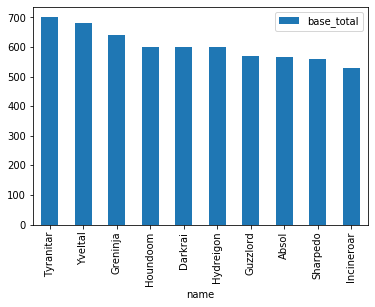

In [32]:
#from matplotlib import cm
#import numpy as np

against_mewtwo = df2.sort_values(by=['against_psychic','base_total'], ascending=[True, False])[['name','against_psychic','hp','attack','defense','speed','sp_attack','sp_defense','base_total','type1','type2','generation','is_legendary']].head(10)

a = against_mewtwo.plot.bar(x='name', y='base_total', rot=90)#, color='type1')
a[0].set_color('r')

In [455]:
against_rayquaza = df2.sort_values(by=['against_dragon','against_flying','base_total'], ascending=[True, True, False])[['name','against_dragon','against_flying','hp','attack','defense','speed','sp_attack','sp_defense','base_total','type1','type2','generation','is_legendary']].head(10)
against_rayquaza

,name,against_dragon,against_flying,hp,attack,defense,speed,sp_attack,sp_defense,base_total,type1,type2,generation,is_legendary
718,Diancie,0.0,0.5,50,160,110,110,160,110,700,rock,fairy,6,1
800,Magearna,0.0,0.5,80,95,115,65,130,115,600,steel,fairy,7,1
784,Tapu Koko,0.0,0.5,70,115,85,130,95,75,570,electric,fairy,7,1
702,Carbink,0.0,0.5,50,50,150,50,50,150,500,rock,fairy,6,0
302,Mawile,0.0,0.5,50,105,125,50,55,95,480,steel,fairy,3,0
706,Klefki,0.0,0.5,57,80,91,75,80,87,470,steel,fairy,6,0
701,Dedenne,0.0,0.5,67,58,57,101,81,67,431,electric,fairy,6,0
715,Xerneas,0.0,1.0,126,131,95,99,131,98,680,fairy,NaN,6,1
281,Gardevoir,0.0,1.0,68,85,65,100,165,135,618,psychic,fairy,3,0
785,Tapu Lele,0.0,1.0,70,85,75,95,130,115,570,psychic,fairy,7,1


In [456]:
against_groudon = df2.sort_values(by=['against_ground','base_total'], ascending=[True, False])[['name','against_ground','hp','attack','defense','speed','sp_attack','sp_defense','base_total','type1','type2','generation','is_legendary']].head(10)
against_groudon

,name,against_ground,hp,attack,defense,speed,sp_attack,sp_defense,base_total,type1,type2,generation,is_legendary
383,Rayquaza,0.0,105,180,100,115,180,100,780,dragon,flying,3,1
372,Salamence,0.0,95,145,130,120,120,90,700,dragon,flying,3,0
248,Lugia,0.0,106,90,130,110,90,154,680,psychic,flying,2,1
249,Ho-Oh,0.0,106,130,90,90,110,154,680,fire,flying,2,1
716,Yveltal,0.0,126,131,95,99,131,98,680,dark,flying,6,1
129,Gyarados,0.0,95,155,109,81,70,130,640,water,flying,1,0
5,Charizard,0.0,78,104,78,100,159,115,634,fire,flying,1,0
141,Aerodactyl,0.0,80,135,85,150,70,95,615,rock,flying,1,0
148,Dragonite,0.0,91,134,95,80,100,100,600,dragon,flying,1,0
644,Landorus,0.0,89,145,90,91,105,80,600,ground,flying,5,1


In [457]:
against_kyogre = df2.sort_values(by=['against_water','base_total'], ascending=[True, False])[['name','against_water','hp','attack','defense','speed','sp_attack','sp_defense','base_total','type1','type2','generation','is_legendary']].head(10)
against_kyogre

,name,against_water,hp,attack,defense,speed,sp_attack,sp_defense,base_total,type1,type2,generation,is_legendary
483,Palkia,0.25,90,120,100,100,150,120,680,water,dragon,4,1
229,Kingdra,0.25,75,95,95,85,95,95,540,water,dragon,2,0
271,Ludicolo,0.25,80,70,70,70,90,100,480,water,grass,3,0
270,Lombre,0.25,60,50,50,50,60,70,340,water,grass,3,0
269,Lotad,0.25,40,30,30,30,40,50,220,water,grass,3,0
383,Rayquaza,0.50,105,180,100,115,180,100,780,dragon,flying,3,1
381,Kyogre,0.50,100,150,90,90,180,160,770,water,NaN,3,1
372,Salamence,0.50,95,145,130,120,120,90,700,dragon,flying,3,0
379,Latias,0.50,80,100,120,110,140,150,700,dragon,psychic,3,1
380,Latios,0.50,80,130,100,110,160,120,700,dragon,psychic,3,1


In [458]:
against_arceus = df2.sort_values(by=['against_normal','base_total'], ascending=[True, False])[['name','against_normal','hp','attack','defense','speed','sp_attack','sp_defense','base_total','type1','type2','generation','is_legendary']].head(10)
against_arceus

,name,against_normal,hp,attack,defense,speed,sp_attack,sp_defense,base_total,type1,type2,generation,is_legendary
486,Giratina,0.0,150,120,100,90,120,100,680,ghost,dragon,4,1
719,Hoopa,0.0,80,160,60,80,170,130,680,psychic,ghost,6,1
791,Lunala,0.0,137,113,89,97,137,107,680,psychic,ghost,7,1
93,Gengar,0.0,60,65,80,130,170,95,600,ghost,poison,1,0
353,Banette,0.0,64,165,75,75,93,83,555,ghost,NaN,3,0
723,Decidueye,0.0,78,107,75,70,100,100,530,grass,ghost,7,0
476,Dusknoir,0.0,45,100,135,45,65,135,525,ghost,NaN,4,0
478,Rotom,0.0,50,65,107,86,105,107,520,electric,ghost,4,0
608,Chandelure,0.0,60,55,90,80,145,90,520,ghost,fire,5,0
680,Aegislash,0.0,60,150,50,60,150,50,520,steel,ghost,6,0


### Best generation to beat top 5

In [1]:
against_top5 = against_mewtwo.append([against_rayquaza, against_groudon, against_kyogre, against_arceus])['generation'].value_counts().plot.bar(figsize=(10,7), color='#0f3766')
for i in against_top5.patches: 
    against_top5.text(i.get_x()+0.10, i.get_height()+0.5, \
        str(round((i.get_height()), 2)), fontsize=11, color='black', rotation=45)

NameError: name 'against_mewtwo' is not defined